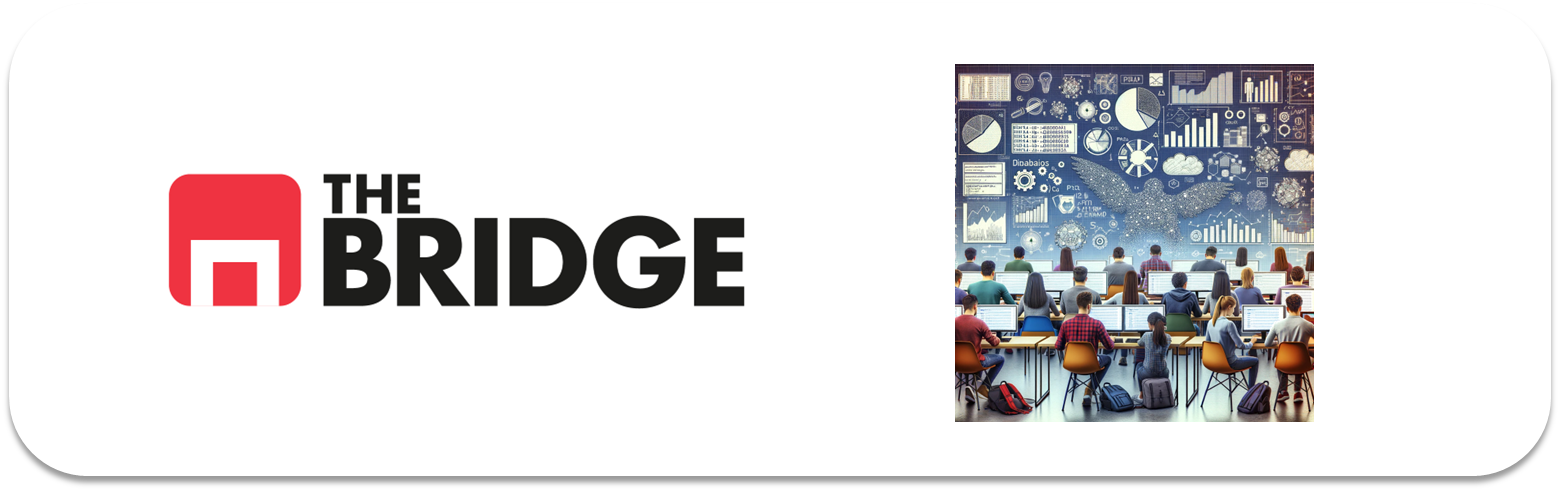

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [8]:
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
excluidas = ["embark_town", "alive", "class", "adult_male"]
target = 'survived'

In [10]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [11]:
df_deck = df_titanic.copy()
df_deck["deck"] = df_deck.deck.fillna("UNK")

In [13]:
# excluidas = ["alive","embark_town","class"]
features_base = [col for col in df_deck.columns if col not in excluidas]
features_base.remove("deck")

features_base_deck = [col for col in df_deck.columns if col not in excluidas]

In [16]:
df_deck = df_deck.dropna(subset="embarked")

In [17]:
df_deck.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         889 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.0+ KB


In [18]:
train_set, test_set = train_test_split(df_deck, test_size=0.2, stratify=df_deck['embarked'], random_state=42)

In [20]:
train_set.embarked.value_counts(True)

embarked
S    0.724332
C    0.188467
Q    0.087201
Name: proportion, dtype: float64

In [21]:
test_set.embarked.value_counts(True)

embarked
S    0.724719
C    0.191011
Q    0.084270
Name: proportion, dtype: float64

In [22]:
# Elegimos la mediana no tanto por la distribución de edades sino para imputar variables discretas.

es_hombre = train_set.who == "man"
es_mujer = train_set.who == "woman"
es_child = train_set.who == "child"

median_man = train_set[es_hombre]["age"].median()
median_woman = train_set[es_mujer]["age"].median()
median_child = train_set[es_child]["age"].median()

es_nulo = train_set.age.isna()
es_nulo_test = test_set.age.isna()

#Imputamos en train
train_set.loc[es_hombre & es_nulo, "age"] = median_man
train_set.loc[es_mujer & es_nulo, "age"] = median_woman
train_set.loc[es_child & es_nulo, "age"] = median_child

#Imputamos en test
test_set.loc[(test_set.who == "man") & es_nulo_test, "age"] = median_man
test_set.loc[(test_set.who == "woman") & es_nulo_test, "age"] = median_woman
test_set.loc[(test_set.who == "child") & es_nulo_test, "age"] = median_child

In [23]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 223 to 142
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     178 non-null    int64  
 1   pclass       178 non-null    int64  
 2   sex          178 non-null    object 
 3   age          178 non-null    float64
 4   sibsp        178 non-null    int64  
 5   parch        178 non-null    int64  
 6   fare         178 non-null    float64
 7   embarked     178 non-null    object 
 8   class        178 non-null    object 
 9   who          178 non-null    object 
 10  adult_male   178 non-null    bool   
 11  deck         178 non-null    object 
 12  embark_town  178 non-null    object 
 13  alive        178 non-null    object 
 14  alone        178 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 19.8+ KB


In [24]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     711 non-null    int64  
 1   pclass       711 non-null    int64  
 2   sex          711 non-null    object 
 3   age          711 non-null    float64
 4   sibsp        711 non-null    int64  
 5   parch        711 non-null    int64  
 6   fare         711 non-null    float64
 7   embarked     711 non-null    object 
 8   class        711 non-null    object 
 9   who          711 non-null    object 
 10  adult_male   711 non-null    bool   
 11  deck         711 non-null    object 
 12  embark_town  711 non-null    object 
 13  alive        711 non-null    object 
 14  alone        711 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 79.2+ KB


<Axes: xlabel='survived', ylabel='count'>

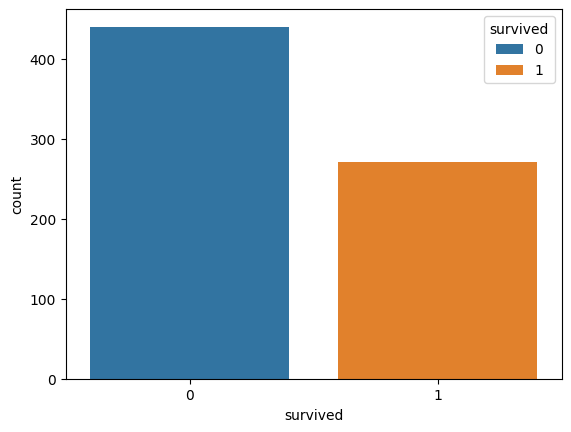

In [25]:
sns.countplot(x=target,data=train_set,hue=target)

In [27]:
train_set[target].value_counts(True)

survived
0    0.618847
1    0.381153
Name: proportion, dtype: float64

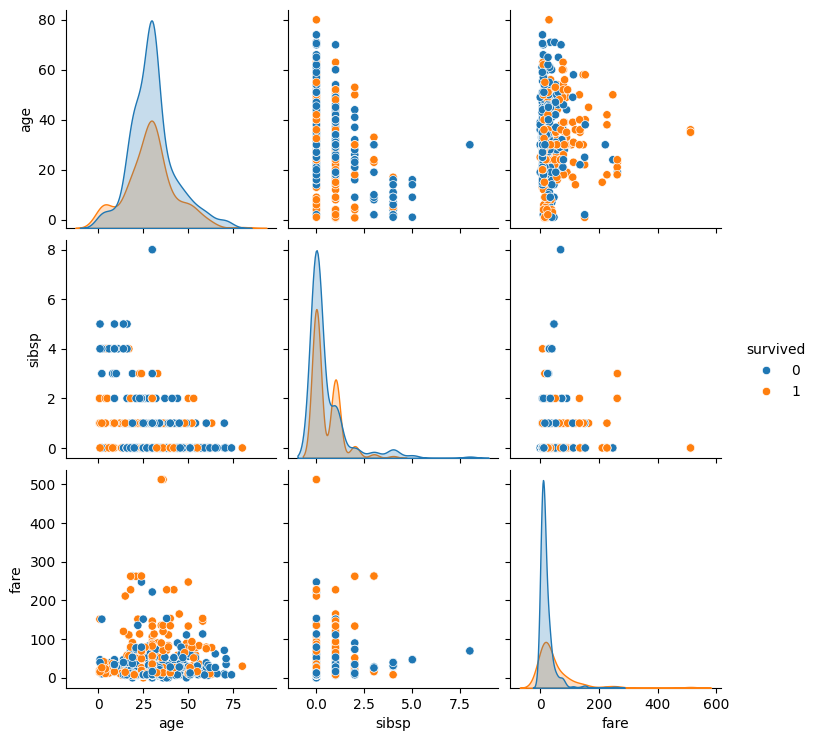

In [28]:
features_num = ['age','sibsp','fare']
sns.pairplot(train_set[features_num + [target]], hue=target)

In [29]:
features_cat = ["pclass","sex","embarked","alone","who","deck"]

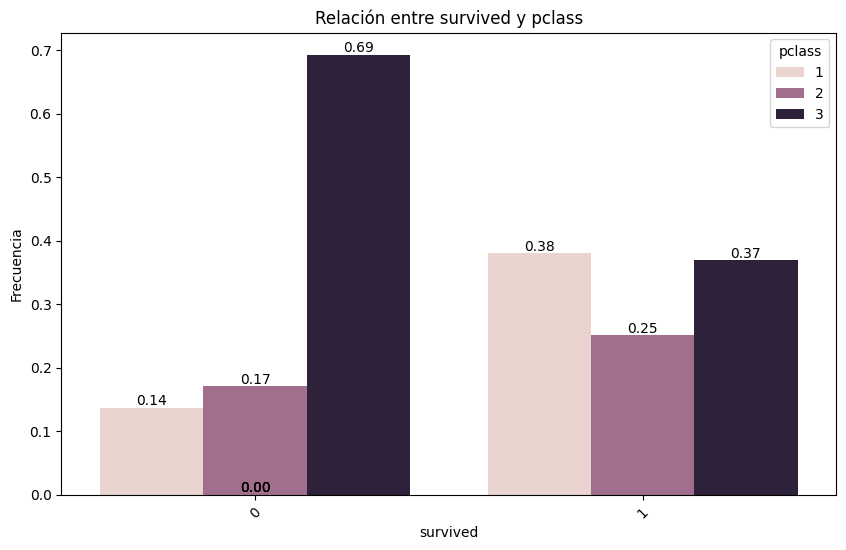

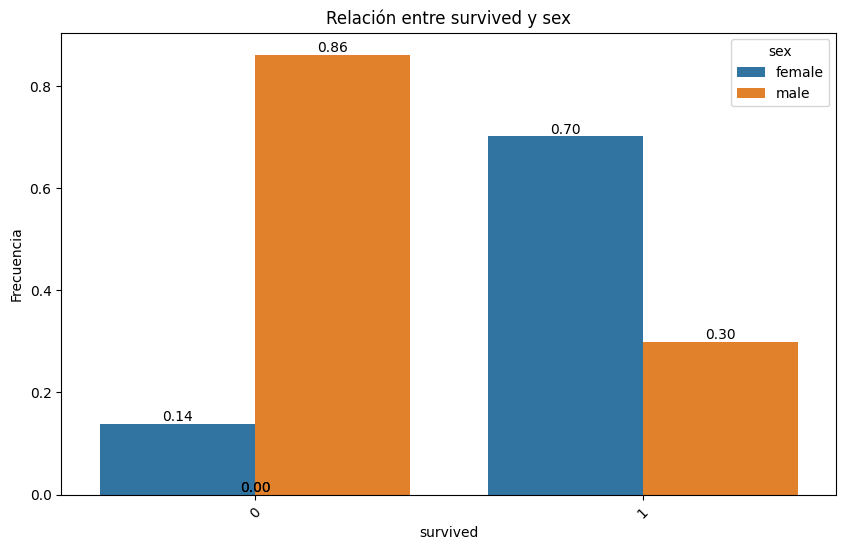

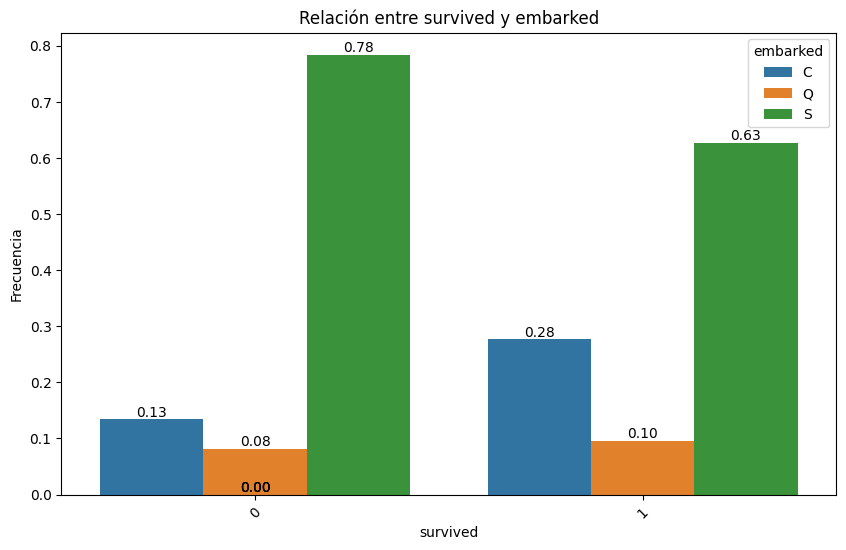

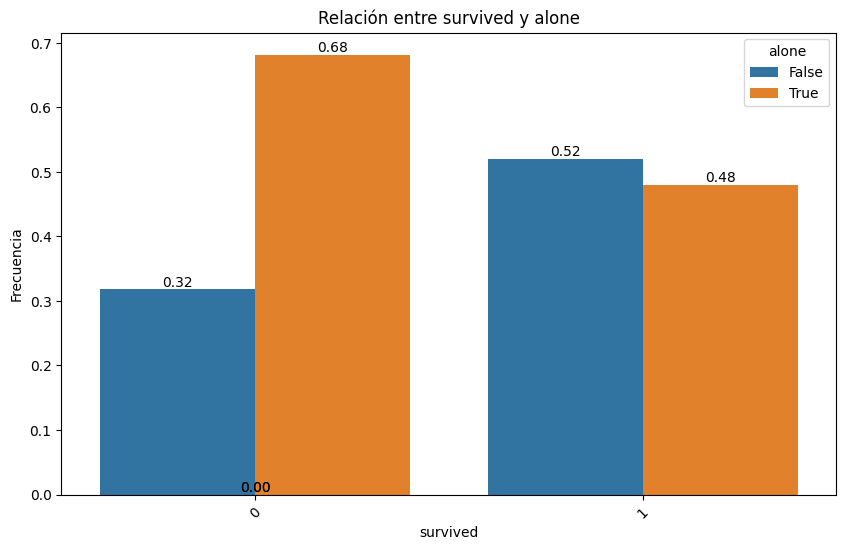

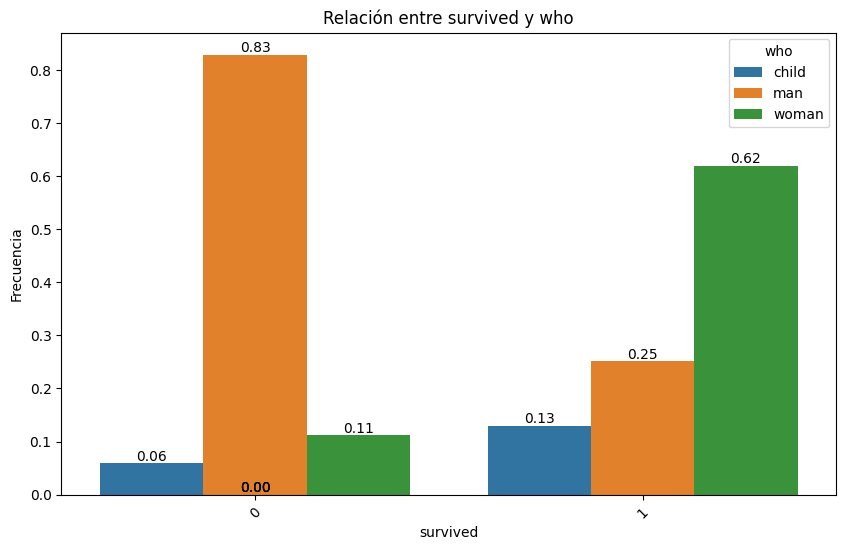

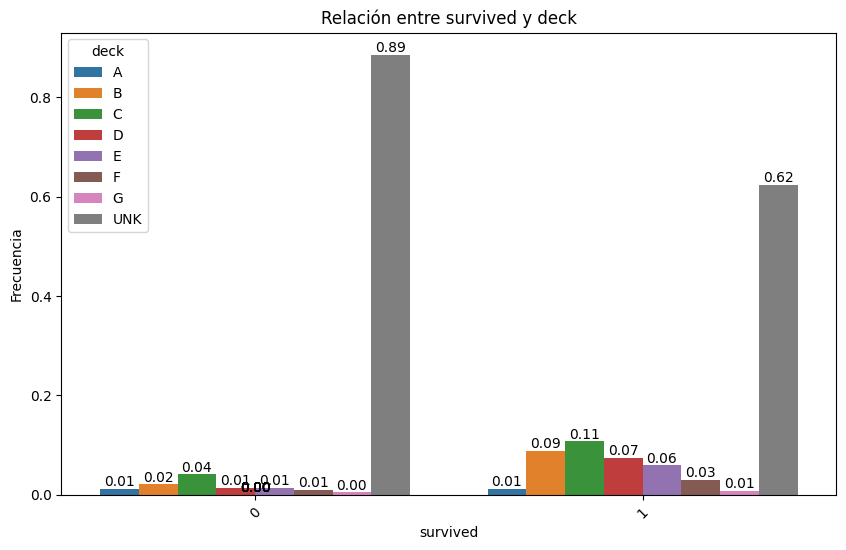

In [31]:
import bootcampviztools as bt
for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

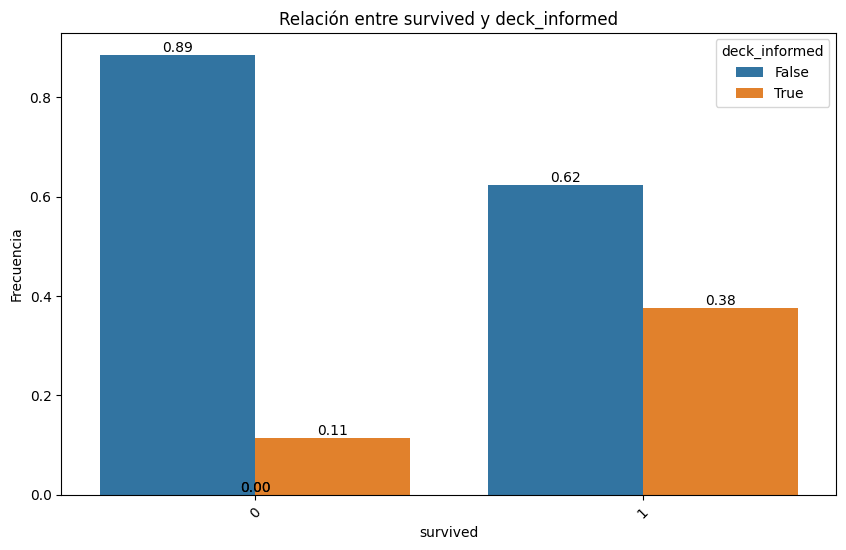

In [32]:
train_set["deck_informed"] = train_set.deck != "UNK"
test_set["deck_informed"] = test_set.deck != "UNK"

bt.plot_categorical_relationship_fin(train_set, target,"deck_informed", show_values= True, relative_freq= True)

In [33]:
features_cat.remove("deck")
features_cat.append("deck_informed")

In [34]:
features_num

['age', 'sibsp', 'fare']

In [35]:
features_cat

['pclass', 'sex', 'embarked', 'alone', 'who', 'deck_informed']

In [37]:
from sklearn.preprocessing import OrdinalEncoder


categories = [["female","male"], ["S","C","Q"], ["child","woman","man"]]

encoder = OrdinalEncoder(categories= categories)

train_set[["sex","embarked","who"]] = encoder.fit_transform(train_set[["sex","embarked","who"]])
test_set[["sex","embarked","who"]] = encoder.transform(test_set[["sex","embarked","who"]])

In [38]:
train_set[["sex","embarked","who"]]

,sex,embarked,who
46,1.0,2.0,2.0
230,0.0,0.0,1.0
657,0.0,2.0,1.0
888,0.0,0.0,1.0
809,0.0,0.0,1.0
...,...,...,...
222,1.0,0.0,2.0
167,0.0,0.0,1.0
123,0.0,0.0,1.0
150,1.0,0.0,2.0


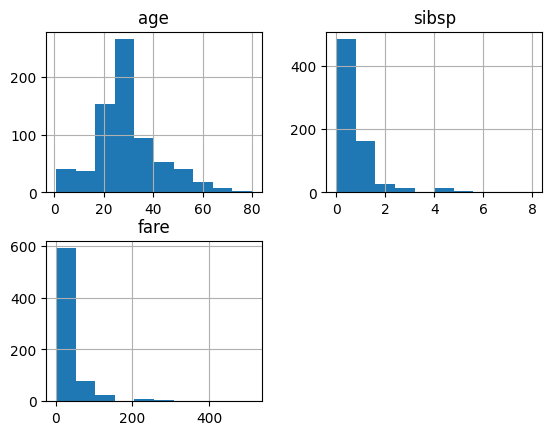

In [39]:
train_set[features_num].hist();

In [41]:
import numpy as np
train_set["fare"] = np.sqrt(train_set["fare"])
test_set["fare"] = np.sqrt(test_set["fare"])

In [42]:
train_set["sibsp"] = np.sqrt(train_set["sibsp"])
test_set["sibsp"] = np.sqrt(test_set["sibsp"])

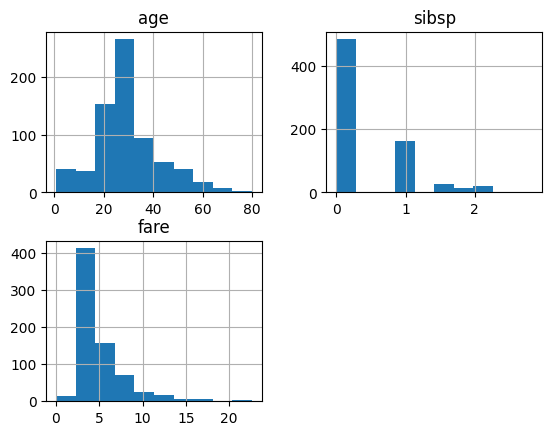

In [43]:
train_set[features_num].hist();

In [44]:
scaler = StandardScaler()

In [45]:
train_set[features_num] = scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [46]:
train_set[features_num].describe()

,age,sibsp,fare
count,7.110000e+02,7.110000e+02,7.110000e+02
mean,9.993569e-17,7.994855e-17,2.748231e-17
std,1.000704e+00,1.000704e+00,1.000704e+00
min,-2.232200e+00,-6.396523e-01,-1.616518e+00
25%,-5.958321e-01,-6.396523e-01,-6.670619e-01
50%,1.790165e-02,-6.396523e-01,-3.522452e-01
75%,4.014852e-01,1.040312e+00,2.429585e-01
max,3.853737e+00,4.112004e+00,6.031542e+00


In [47]:
test_set[features_num].describe()

,age,sibsp,fare
count,178.000000,178.000000,178.000000
mean,-0.020422,0.045305,0.097663
std,0.974226,1.139336,0.967723
min,-2.251379,-0.639652,-1.616518
25%,-0.442399,-0.639652,-0.657836
50%,0.017902,-0.639652,-0.199008
75%,0.401485,1.040312,0.428358
max,2.702987,4.112004,3.863155


In [48]:
train_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_informed
46,0,3,1.0,0.017902,1.040312,0,-0.286239,2.0,Third,2.0,True,UNK,Queenstown,no,False,False
230,1,1,0.0,0.401485,1.040312,0,1.470612,0.0,First,1.0,False,C,Southampton,yes,False,True
657,0,3,0.0,0.171335,1.040312,1,-0.286239,2.0,Third,1.0,False,UNK,Queenstown,no,False,False
888,0,3,0.0,0.017902,1.040312,2,0.019727,0.0,Third,1.0,False,UNK,Southampton,no,False,False
809,1,1,0.0,0.248052,1.040312,0,0.845686,0.0,First,1.0,False,E,Southampton,yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,3,1.0,1.628953,-0.639652,0,-0.657836,0.0,Third,2.0,True,UNK,Southampton,no,True,False
167,0,3,0.0,1.168652,1.040312,4,0.168238,0.0,Third,1.0,False,UNK,Southampton,no,False,False
123,1,2,0.0,0.209693,-0.639652,0,-0.398234,0.0,Second,1.0,False,E,Southampton,yes,True,True
150,0,2,1.0,1.628953,-0.639652,0,-0.420698,0.0,Second,2.0,True,UNK,Southampton,no,True,False


In [49]:
features_set_cat_1 = ["pclass","who"] # set de categóricas 1
features_set_cat_2 = features_cat # set de categóricas 2

In [50]:
X_train = train_set[features_set_cat_1]
y_train = train_set[target]

X_test = test_set[features_set_cat_1]
y_test = test_set[target]

In [51]:
log_class_1 = LogisticRegression(max_iter = 10000) # Hiperparámetros

log_class_1.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [52]:
def metrics_titanic(model, X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       440
           1       0.84      0.58      0.68       271

    accuracy                           0.80       711
   macro avg       0.81      0.75      0.77       711
weighted avg       0.80      0.80      0.79       711



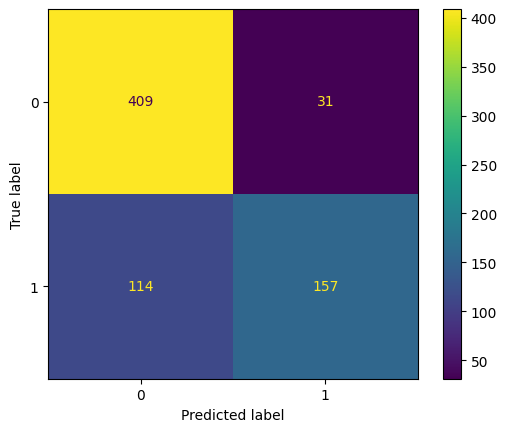

In [53]:
metrics_titanic(log_class_1, X_train, y_train)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       109
           1       0.78      0.57      0.66        69

    accuracy                           0.77       178
   macro avg       0.77      0.73      0.74       178
weighted avg       0.77      0.77      0.76       178



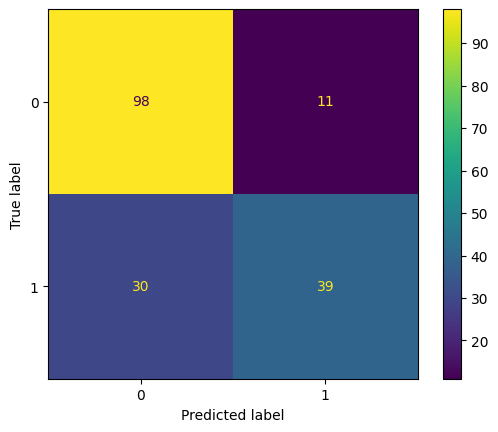

In [54]:
metrics_titanic(log_class_1, X_test, y_test)

AUROC: 0.83


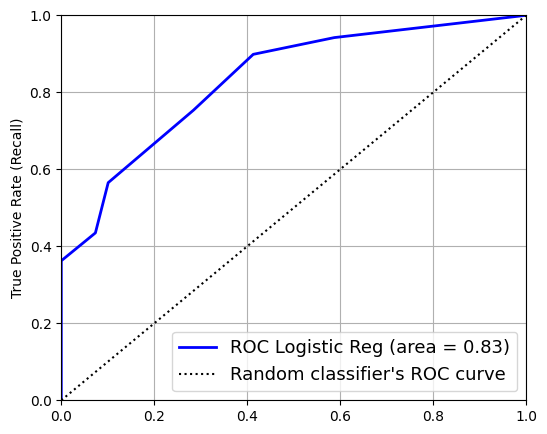

In [55]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [56]:
X_train = train_set[features_set_cat_2]
y_train = train_set[target]

X_test = test_set[features_set_cat_2]
y_test = test_set[target]

In [57]:
log_class_2 = LogisticRegression(max_iter = 10000)

log_class_2.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       440
           1       0.80      0.71      0.75       271

    accuracy                           0.82       711
   macro avg       0.82      0.80      0.81       711
weighted avg       0.82      0.82      0.82       711



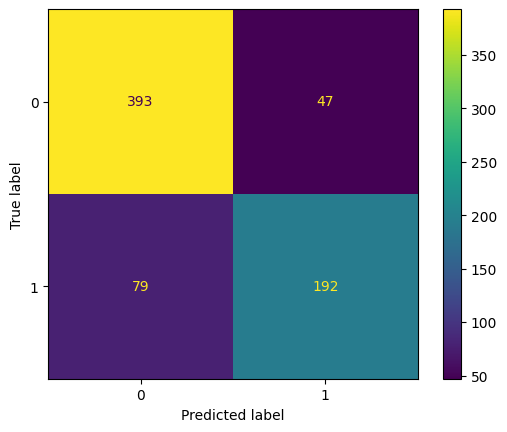

In [58]:
metrics_titanic(log_class_2, X_train,y_train)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.77      0.67      0.71        69

    accuracy                           0.79       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



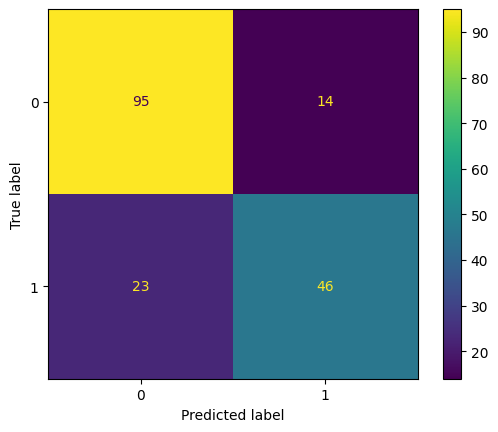

In [59]:
metrics_titanic(log_class_2, X_test, y_test)

AUROC: 0.84


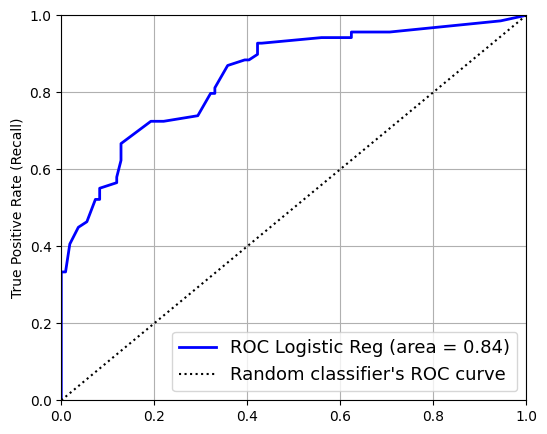

In [60]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [61]:
### Con numéricas

X_train = train_set[features_set_cat_2 + features_num]
y_train = train_set[target]
X_test = test_set[features_set_cat_2 + features_num]
y_test = test_set[target]

log_class_3 = LogisticRegression(max_iter = 10000)

log_class_3.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       440
           1       0.78      0.72      0.75       271

    accuracy                           0.82       711
   macro avg       0.81      0.80      0.80       711
weighted avg       0.82      0.82      0.82       711



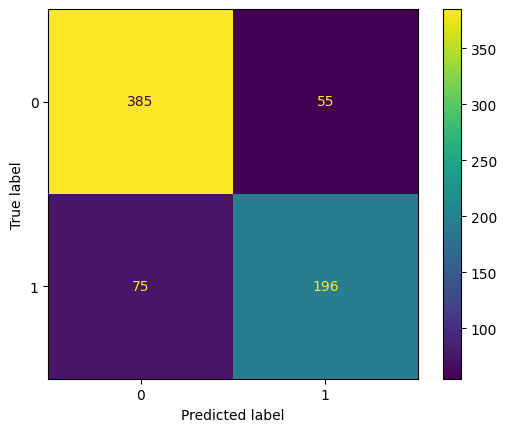

In [62]:
metrics_titanic(log_class_3, X_train, y_train)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       109
           1       0.75      0.70      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



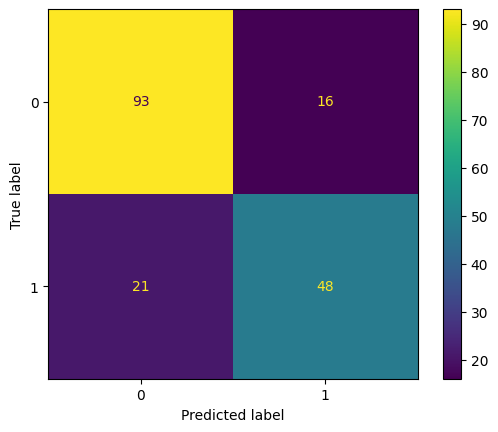

In [63]:
metrics_titanic(log_class_3, X_test, y_test)

AUROC: 0.85


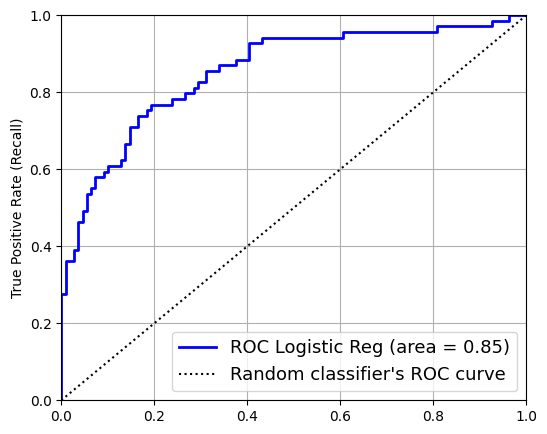

In [64]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [65]:
data_base = {
    "pclass": 2,
    "embarked": 0,
    "alone": True,
    "fare": 0,
    "who":2,
    "deck_informed": 0,
    "sibsp": 0,
    "sex": 0
}

probs = []
for age in range(30,41):
    data = data_base.copy()
    data["age"] = age
    X_man = pd.DataFrame([data])
    X_man[features_num] = scaler.transform(X_man[features_num])
    print(X_man)
    prob_dead, prob_surv = log_class_3.predict_proba(X_man[features_set_cat_2 + features_num])[0]
    probs.append(prob_surv)
    
print("Prob media de sobrevivir:", np.mean(probs))

   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.639652    0   

        age  
0  0.017902  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.639652    0   

        age  
0  0.094618  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.639652    0   

        age  
0  0.171335  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.639652    0   

        age  
0  0.248052  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.639652    0   

        age  
0  0.324769  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.